In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from Utils import *
from constants import *

from Environment import *
from Non_Stationary_Environment import *

from Social_influence import *
from Network import Network

from Simulation import *

from Ecommerce import *
from Ecommerce3 import *
from Ecommerce4 import *
from Ecommerce5 import *
from Ecommerce6 import *
from step7.Ecommerce7 import*

C:\Users\utente\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\utente\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\utente\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Plot learned functions in GP

In [3]:
graph_weights, alpha_bars, product_prices, users_reservation_prices, \
    observations_probabilities, users_poisson_parameters = setup_environment()

env = Environment(users_reservation_prices, graph_weights, alpha_bars)

ecomm = Ecommerce(B_cap, budgets, product_prices)
ecomm3_gpts = Ecommerce3_GPTS(B_cap, budgets, product_prices)
ecomm3_gpucb = Ecommerce3_GPUCB(B_cap, budgets, product_prices)

for t in tqdm(range(0, T), position = 0, desc="n_iteration"):
    # Every day a new montecarlo simulation must be run to sample num of items sold
    num_sold_items = estimate_nodes_activation_probabilities(
        env.network.get_adjacency_matrix(),
        env.users_reservation_prices,
        users_poisson_parameters,
        product_prices,
        observations_probabilities
    )

    expected_reward = env.compute_clairvoyant_reward(
        num_sold_items,
        product_prices,
        budgets
    )     

    # aggregation is needed since in this step the ecommerce
    # cannot observe the users classes features
    aggregated_num_sold_items = np.sum(num_sold_items, axis = 0)

    arm, arm_idxs = ecomm3_gpts.pull_arm(aggregated_num_sold_items)
    # the environment returns the users_alpha and the reward for that allocation
    alpha, _ = env.round_step3(pulled_arm = arm, pulled_arm_idxs = arm_idxs)
    ecomm3_gpts.update(arm_idxs, alpha)

    arm, arm_idxs = ecomm3_gpucb.pull_arm(aggregated_num_sold_items)
    alpha, _ = env.round_step3(pulled_arm = arm, pulled_arm_idxs = arm_idxs)
    ecomm3_gpucb.update(arm_idxs, alpha)

plot_learned_functions(ecomm3_gpts, ecomm3_gpucb, env)

n_iteration:   0%|          | 0/30 [00:02<?, ?it/s]


KeyboardInterrupt: 

## Step 3

Experiment n°: 1
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


Experiment n°: 2
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


Experiment n°: 3
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:44<00:00,  1.64s/it]


Experiment n°: 4
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


Experiment n°: 5
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [03:53<00:00,  2.34s/it]


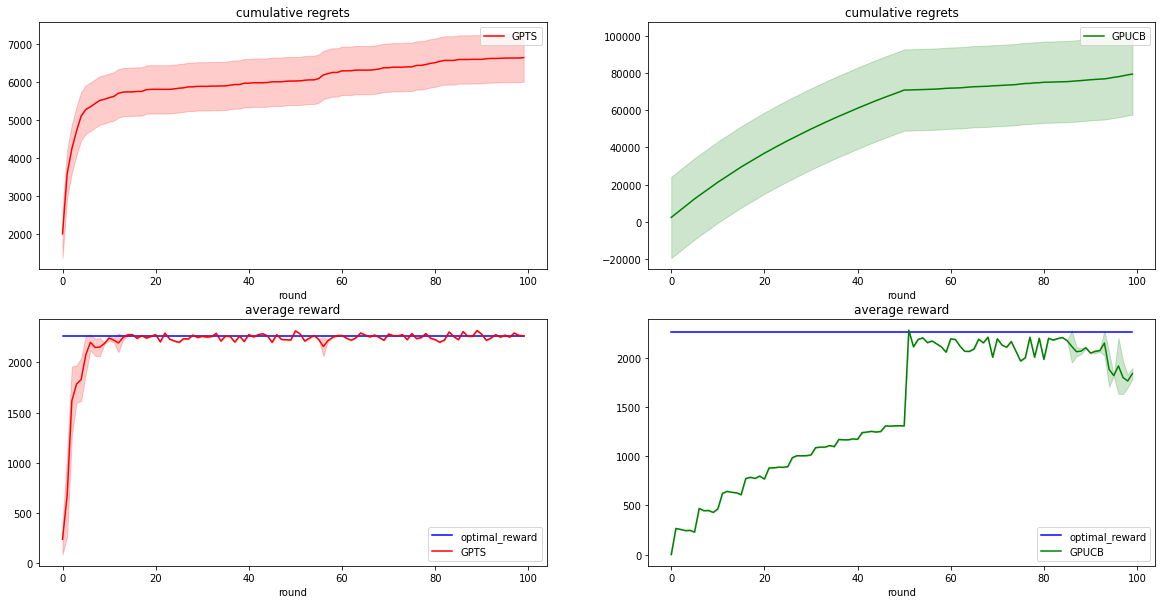

In [3]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step3() # mc
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

Experiment n°: 1
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [13:40<00:00,  8.21s/it]


Experiment n°: 2
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [12:15<00:00,  7.35s/it]


Experiment n°: 3
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [11:31<00:00,  6.92s/it]


Experiment n°: 4
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [11:05<00:00,  6.65s/it]


Experiment n°: 5
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [11:22<00:00,  6.82s/it]


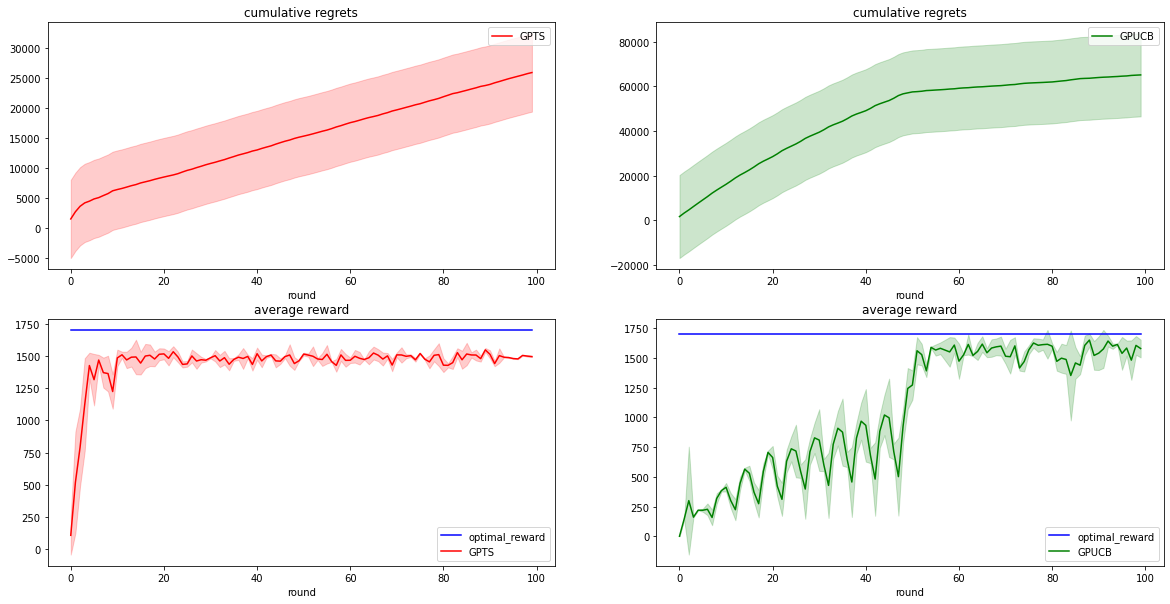

In [3]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step3() # social influence originale
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

Experiment n°: 1
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


Experiment n°: 2
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:29<00:00,  1.49s/it]


Experiment n°: 3
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:20<00:00,  1.41s/it]


Experiment n°: 4
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [03:31<00:00,  2.11s/it]


Experiment n°: 5
graph
[[0.   0.81 0.15 0.25 0.59]
 [0.15 0.   0.12 0.54 0.74]
 [0.55 0.95 0.   0.32 0.81]
 [0.57 0.87 0.33 0.   0.77]
 [0.24 0.47 0.77 0.31 0.  ]]


n_iteration: 100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


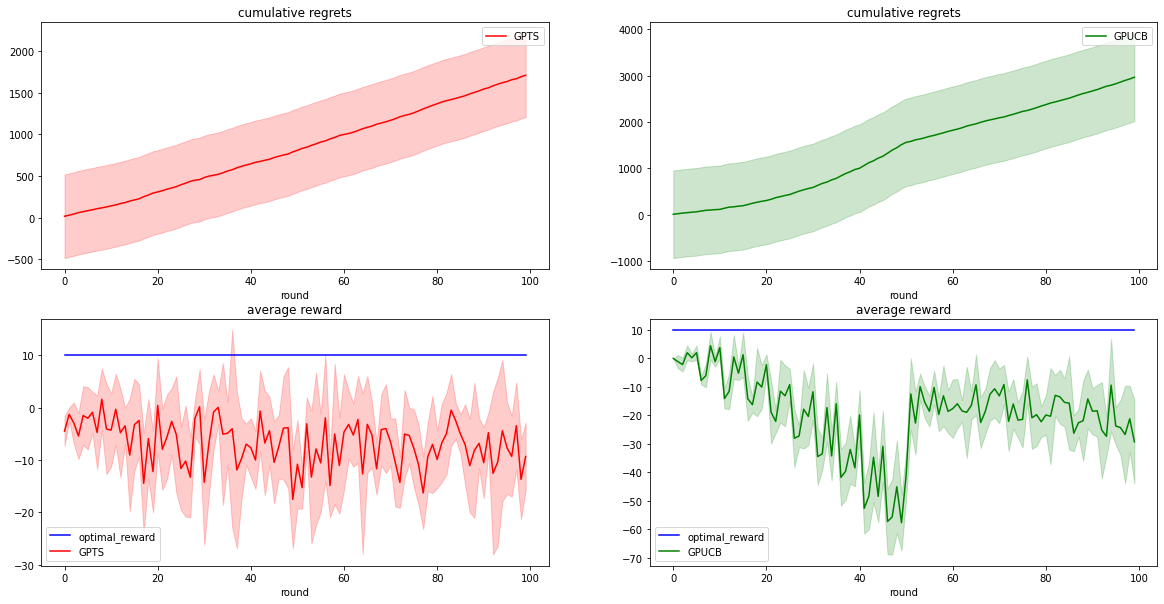

In [5]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step3() # no mc
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

## Step 4

In [4]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step4()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

Experiment n°: 1


ValueError: too many values to unpack (expected 4)

## Step 5

In [ ]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step5()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

## Step 6

In [ ]:
swucb_rewards_per_experiment, cducb_rewards_per_experiment, opts = simulate_step6()
plot_regrets(swucb_rewards_per_experiment, cducb_rewards_per_experiment, opts, ["SWUCB", "CDUCB"])

## Step 7

In [ ]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step7()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])